In this notebook, we use NQFS to study the ground state of a generic Hamiltonian:

\begin{equation}
H = \ \frac{1}{2m} \int dx \frac{d\hat{\psi}^\dagger(x)}{dx} \frac{d \hat{\psi} (x)}{dx} 
+ \int dx \ (V(x)- \mu) \hat{\psi}^\dagger(x) \hat{\psi} (x) 
 + \frac{1}{2} \int dx dy \ \hat{\psi}^\dagger(x) \hat{\psi}^\dagger(y) \hat{\psi}(y) \hat{\psi}(x) W(x-y).
\end{equation}


In [2]:
# Allow to import packages from NQFS Repo on Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Allow to import classes from ./modules
import sys
sys.path.insert(1, '/content/drive/My Drive/Research/NQFS Repo/modules')    # Set this directory to wherever the /modules folder is stored

Mounted at /content/drive


In [3]:
# Import packages
import numpy as np
import torch
import torch.nn as nn 
import torch.nn.functional as F
import matplotlib.pyplot as plt

# from deep_sets import Deep_Sets
from nqfs import NQFS

In [13]:
# Creates NQFS


# NQFS parameters
DS_width = 100        # Width of the neural networks in the NQFS
DS_depth_phi = 3      # Depth of the phi neural network in the NQFS
DS_depth_rho = 3      # Depth of the rho neural network in the NQFS
L = 1                 # System length 
periodic = True       # System periodicity

# Creates NQFS
myNQFS = NQFS(DS_width, DS_depth_phi, DS_depth_rho, L, periodic)

# Initializes GPU, moves NQFS to GPU
GPU_device = torch.device("cuda:0")
myNQFS.DS1.to(GPU_device)
myNQFS.DS2.to(GPU_device)
torch.set_default_dtype(torch.float32)

In [12]:
# Sets up Hamiltonian


# Hamiltonian parameters
m = 1/2                               # Mass
mu = 5                                # Chemical potential

def V(x):                             # External potential
  val = 0*x
  return val

a = 0.9                               # Here we select a constant potnetial W(x-y)=a
def W(xy):                            # Interaction potential, xy=|x-y|
  val = a + 0*xy                      
  # val = 1/(xy)
  return val

n_exact = np.round((mu+1/2)/a)
E_exact = a*n_exact*(n_exact-1)/2 - mu*n_exact
print('n_exact: ' + str(n_exact))
print('E_exact: ' + str(E_exact))

n_exact: 6.0
E_exact: -16.5


In [14]:
# Minimize energy of NQFS


# MCMC parameters
n_samples = 800       # Number of samples per MCMC chain
n_chains = 100        # Number of independent MCMC chains
p_pm = 0.25           # Probability of increasing/decreasing particle number in configuration proposal

# Optimization parameters
beta_1 = 0.9          # ADAM parameter      
beta_2 = 0.999        # ADAM parameter
lr = 1e-3             # Learning rate
lr_q = 1e-1           # Learning rate for q_n
n_iters = 200           # Number of ADAM iterations to be performed

# Minimizes energy
Es, E_stds, n_means, n_stds = \
  myNQFS.minimize_energy_ADAM(n_samples, n_chains, p_pm, GPU_device, 
                              m, mu, V, W, beta_1, beta_2, lr, lr_q, n_iters)

Iteration: 1/200
Energy: -7.421 +- 0.063
Number of particles: 1.699 +- 1.053


Iteration: 2/200
Energy: -8.412 +- 0.065
Number of particles: 1.956 +- 1.069


Iteration: 3/200
Energy: -9.254 +- 0.056
Number of particles: 2.203 +- 1.062


Iteration: 4/200
Energy: -9.96 +- 0.052
Number of particles: 2.404 +- 1.05


Iteration: 5/200
Energy: -10.698 +- 0.046
Number of particles: 2.617 +- 1.014


Iteration: 6/200
Energy: -11.169 +- 0.049
Number of particles: 2.767 +- 0.984


Iteration: 7/200
Energy: -11.474 +- 0.042
Number of particles: 2.864 +- 0.964


Iteration: 8/200
Energy: -11.845 +- 0.045
Number of particles: 2.99 +- 0.946


Iteration: 9/200
Energy: -12.009 +- 0.045
Number of particles: 3.059 +- 0.941


Iteration: 10/200
Energy: -12.262 +- 0.042
Number of particles: 3.161 +- 0.935


Iteration: 11/200
Energy: -12.569 +- 0.044
Number of particles: 3.272 +- 0.945


Iteration: 12/200
Energy: -12.737 +- 0.042
Number of particles: 3.372 +- 0.955


Iteration: 13/200
Energy: -13.04 +- 0.039
Nu

In [ ]:
# OPTIONAL: Can also run the following staggered optimization, which switches 
# between optimizing over the neural networks and q_n parmareters (roughly, it
# optimizes over P_n and \varphi_n seperately); this can improve performance

p_pm = 0.25           # Probability of increasing/decreasing particle number in configuration proposal
lr = 1e-3             # Learning rate
lr_q = 0              # Learning rate for q_n
n_iters = 200         # Number of ADAM iterations to be performed
Es, E_stds, n_means, n_stds = \
  myNQFS.minimize_energy_ADAM(n_samples, n_chains, p_pm, GPU_device, 
                              m, mu, V, W, beta_1, beta_2, lr, lr_q, n_iters)

p_pm = 0.25           # Probability of increasing/decreasing particle number in configuration proposal  
lr = 0                # Learning rate
lr_q = 5e-2           # Learning rate for q_n
n_iters = 200         # Number of ADAM iterations to be performed
Es, E_stds, n_means, n_stds = \
  myNQFS.minimize_energy_ADAM(n_samples, n_chains, p_pm, GPU_device, 
                              m, mu, V, W, beta_1, beta_2, lr, lr_q, n_iters)
  
p_pm = 0.25           # Probability of increasing/decreasing particle number in configuration proposal  
lr = 1e-3             # Learning rate
lr_q = 5e-2           # Learning rate for q_n
n_iters = 200         # Number of ADAM iterations to be performed
Es, E_stds, n_means, n_stds = \
  myNQFS.minimize_energy_ADAM(n_samples, n_chains, p_pm, GPU_device, 
                              m, mu, V, W, beta_1, beta_2, lr, lr_q, n_iters)

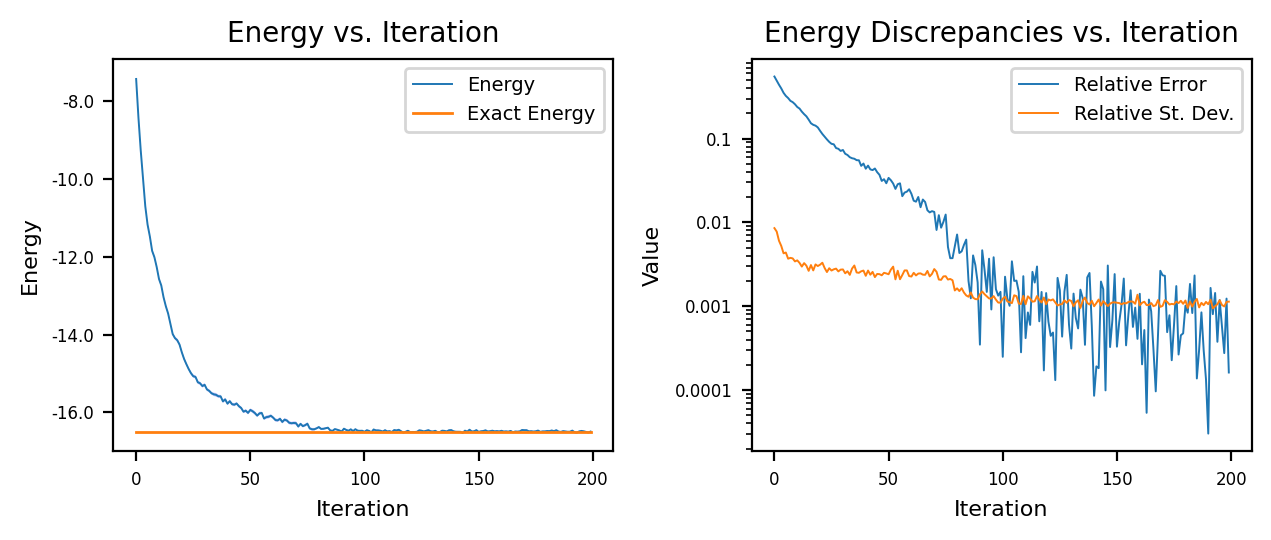

In [15]:
# Plots energy vs iteration
start = 0
end = n_iters
myNQFS.plot_energy(Es, E_stds, E_exact, start, end)

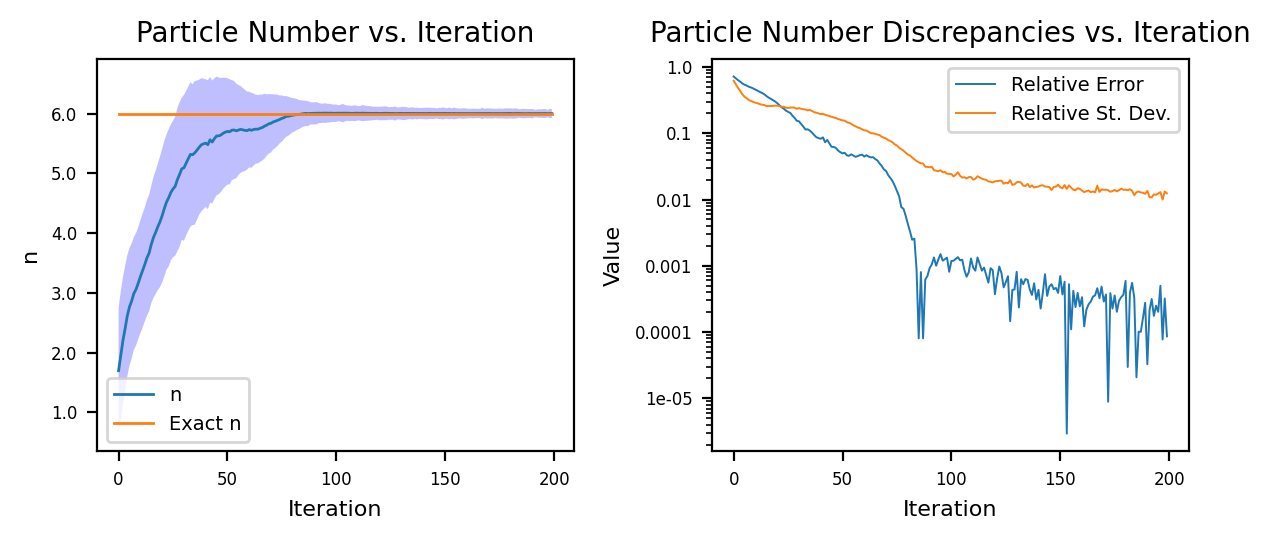

In [16]:
# Plots particle number vs iteration
start = 0
end = n_iters
myNQFS.plot_n(n_means, n_stds, n_exact, start, end)

In [17]:
# Estimate energy and particle number, uses repeated sampling to decrease variance

# MCMC parameters
n_samples = 1000                  # Number of samples per MCMC chain
n_chains = 100                    # Number of independent MCMC chains
p_pm = 0.05                       # Probability of increasing/decreasing particle number in configuration proposal
n_0 = round(n_means[-1].item())   # Initial particle number of each MCMC chain
N_reps = 5                        # Number of repetitions over which estimates are computed

Es_reps = np.zeros(N_reps)
E_stds_reps = np.zeros(N_reps)

# Use repeated sampling to decrease variance of estimates, estimates energy and 
# particle number over N_Reps repetitions
for j in range(N_reps):
  print('Repetition: ' + str(j+1) + '/' + str(N_reps))
  
  # Generate MCMC samples
  x_sorted, n, chain_idx_sorted = \
    myNQFS.GenerateMCMCSamples_FockSpace(n_samples, n_chains, p_pm, n_0, 
                                         GPU_device)

  # Concatenates particle numbers   
  if j == 0:
    n_total = n[None,:] 
  else:
    n_total = torch.cat((n_total, n[None,:]), dim=0)
    
  # Estimates energy, concatenates results    
  E, E_std = myNQFS.Energy_Estimate(x_sorted, chain_idx_sorted, n_chains, 
                                    GPU_device, m, mu, V, W)

  Es_reps[j-1] = E.detach().clone()
  E_stds_reps[j-1] = E_std.detach().clone()
    

# Computes final mean and standard deviation
E_mean_final = np.mean(Es_reps)
E_std_final = (np.mean(E_stds_reps**2)/N_reps)**(0.5)

n_total = n_total.cpu().numpy().astype(float)
n_mean_final = np.mean(n_total)
n_std_final = np.std(n_total)

print('\n')
print("Energy: " + str(E_mean_final) + " +- " + str(E_std_final))
print("Number of particles: " + str(n_mean_final) + " +- " + str(n_std_final))

Repetition: 1/5
Repetition: 2/5
Repetition: 3/5
Repetition: 4/5
Repetition: 5/5


Energy: -16.480495071411134 +- 0.0049805867627345365
Number of particles: 6.000834285714285 +- 0.08038756813216882
